In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ea import *
from visual_utils import *
from perturbs import *
from crossovers import *

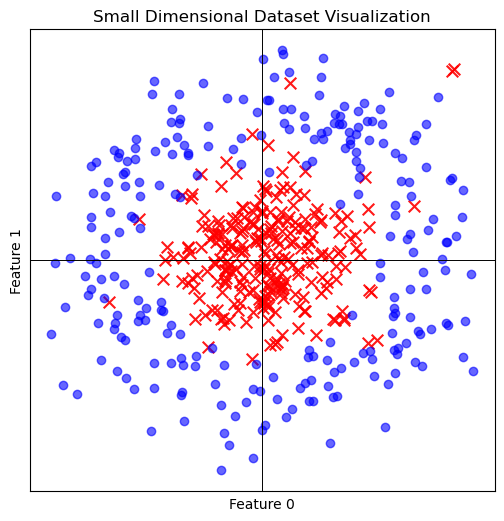

In [2]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

# dataset_dict = generate_multidimensional_dataset()
# visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

fitness_fn_1 = lambda tree: fitness(tree, dataset_dict)

In [ ]:
perturbation = lambda tree: randomly_grow(
    tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.05
)


# perturbation = lambda tree: combined_perturb(
#     tree,
#     feature_bounds=dataset_dict["feature_bounds"],
#     prob_value=0.05,  # change value by a small step
#     prob_add=0.06,  # expand leaf
#     prob_prune=0.01,  # prune somewhere
# )


fitness_fn = fitness_fn_1

# init_fn = lambda: Tree(
#     feature_bounds=dataset_dict["feature_bounds"], generation_type="basic"
#     )

# init_fn = lambda : Tree(
#         feature_bounds=dataset_dict["feature_bounds"], generation_type="coinflip"
#     )

init_fn = lambda : Tree(
        feature_bounds=dataset_dict["feature_bounds"], generation_type="clever"
    )

prob_crossover = 0.8
prob_mutation = 0.5
tournament_size = 25
population_size = 350

# do not change below:
max_evals = 10_000
trials = 10

fitness_list = []
sizes = []
for trial in range(trials):

    results = evolutionary_algorithm(
        fitness_function=fitness_fn,
        perturb_fn=perturbation,
        init_fn=init_fn,
        max_evaluations=max_evals,
        crossover_fn=crossover_swap_random_subtrees,  # only one implemented
        prob_crossover=prob_crossover,
        prob_mutation=prob_mutation,
        tournament_size=tournament_size,
        population_size=population_size
    )

    fitness_list.append(results["best_fitness"])
    sizes.append(results["best_tree"].size())

fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)
print("sizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

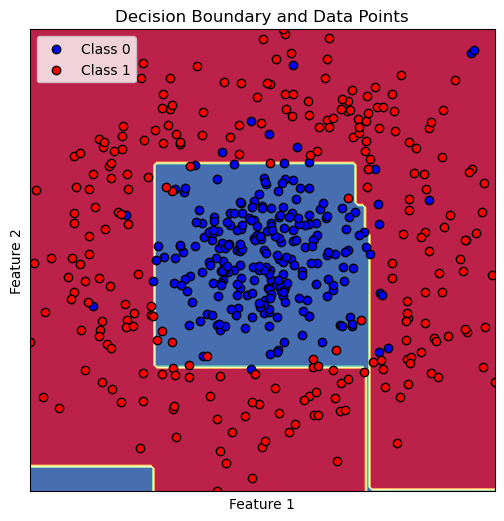

best fitness:  0.934


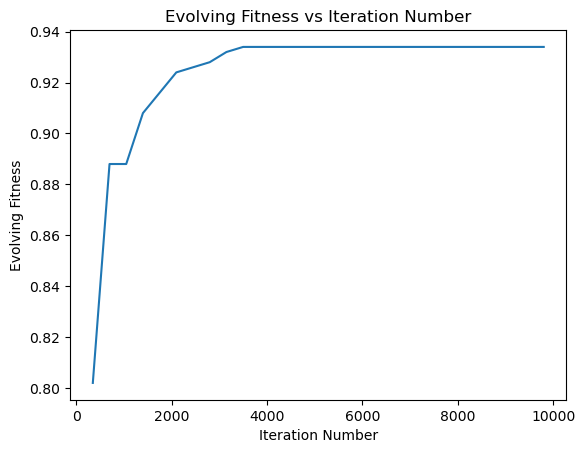

49


In [46]:
results = evolutionary_algorithm(
    fitness_function=fitness_fn,
    perturb_fn=perturbation,
    init_fn=init_fn,
    max_evaluations=max_evals,
    crossover_fn=crossover_swap_random_subtrees,  # only one implemented
    prob_crossover=prob_crossover,
    prob_mutation=prob_mutation,
    tournament_size=tournament_size,
    population_size=population_size,
)

best_tree = results["best_tree"]
visualise_tree_decision(best_tree, dataset_dict)
best = results["best_fitness"]
print("best fitness: ", best)
# best_tree.print_tree_traverse()

history = results["history"]
evolving_fitnesses = [iteration["best_overall_fitness"] for iteration in history]

plt.plot(
    population_size * (np.arange(len(evolving_fitnesses))+1),
    evolving_fitnesses,
)
plt.xlabel('Iteration Number')
plt.ylabel('Evolving Fitness')
plt.title('Evolving Fitness vs Iteration Number')
plt.show()


# simple_graph(
#     evolving_fitnesses,
#     "Step",
#     "Fitness",
#     f"Evolving best fitness in each population",
# )

print(best_tree.size())